In [32]:
import numpy as np
from sklearn.metrics import adjusted_rand_score, silhouette_score
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import umap.umap_ as umap
from sklearn.cluster import KMeans

In [40]:
# Load embeddings and labels
X_llm = np.load('llama_input_test_embeddings.npy')
y_encoded = np.load('y_test.npy')

# Fit UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42, n_components=2)

X_llm_2d = reducer.fit_transform(X_llm)

/opt/anaconda3/envs/ollama_env/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/ollama_env/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [35]:
# === Cluster with KMeans ===
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_llm_2d)

# === Evaluation Metrics ===
ari = adjusted_rand_score(y_encoded, clusters)
ari_flipped = adjusted_rand_score(1 - y_encoded, clusters)
sil_score = silhouette_score(X_llm_2d, clusters)

# === Print results ===
print("📊 Clustering Evaluation Metrics:")
print(f"Adjusted Rand Index (original labels): {ari:.4f}")
print(f"Adjusted Rand Index (flipped labels):  {ari_flipped:.4f}")
print(f"Silhouette Score (w.r.t. clusters):    {sil_score:.4f}")


📊 Clustering Evaluation Metrics:
Adjusted Rand Index (original labels): 0.1437
Adjusted Rand Index (flipped labels):  0.1437
Silhouette Score (w.r.t. clusters):    0.6451


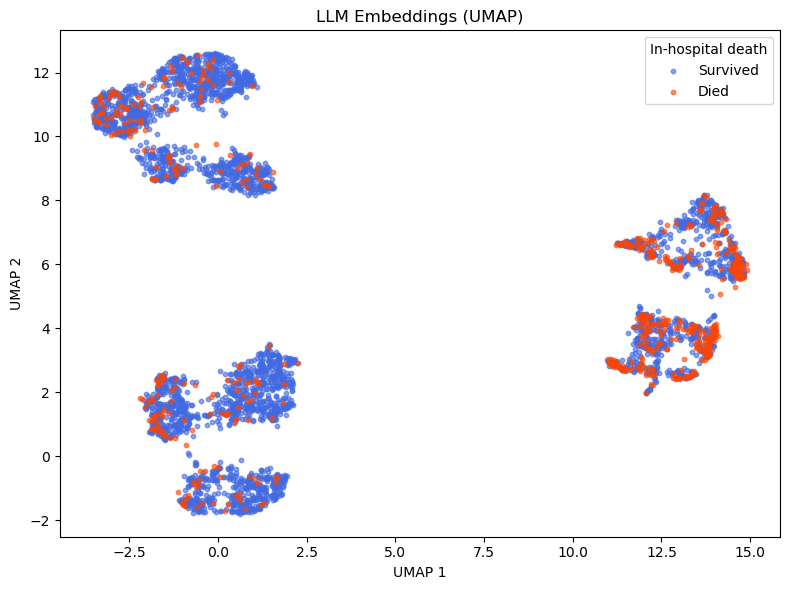

In [44]:
plt.figure(figsize=(8, 6))

colors = ['royalblue', 'orangered']
labels = ['Survived', 'Died']

for cls, color, label in zip([0, 1], colors, labels):
    plt.scatter(
        X_llm_2d[y_encoded == cls, 0],
        X_llm_2d[y_encoded == cls, 1],
        c=color,
        label=label,
        s=10,
        alpha=0.6
    )

plt.title("LLM Embeddings (UMAP)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(title="In-hospital death")
plt.tight_layout()
plt.show()

In [42]:
# === Apply t-SNE ===
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_llm_2d_tsne = tsne.fit_transform(X_llm)

In [43]:
# === Cluster with KMeans ===
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_llm_2d_tsne)

# === Evaluation Metrics ===
ari = adjusted_rand_score(y_encoded, clusters)
ari_flipped = adjusted_rand_score(1 - y_encoded, clusters)
sil_score = silhouette_score(X_llm_2d_tsne, clusters)

# === Print results ===
print("📊 Clustering Evaluation Metrics:")
print(f"Adjusted Rand Index (original labels): {ari:.4f}")
print(f"Adjusted Rand Index (flipped labels):  {ari_flipped:.4f}")
print(f"Silhouette Score (w.r.t. clusters):    {sil_score:.4f}")


📊 Clustering Evaluation Metrics:
Adjusted Rand Index (original labels): 0.1310
Adjusted Rand Index (flipped labels):  0.1310
Silhouette Score (w.r.t. clusters):    0.4153


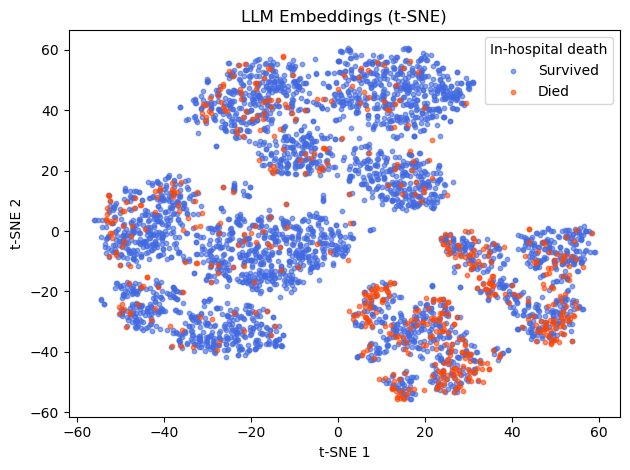

In [45]:
for cls, color, label in zip([0, 1], colors, labels):
    plt.scatter(
        X_llm_2d_tsne[y_encoded == cls, 0],
        X_llm_2d_tsne[y_encoded == cls, 1],
        c=color,
        label=label,
        s=10,
        alpha=0.6
    )

plt.title("LLM Embeddings (t-SNE)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title="In-hospital death")
plt.tight_layout()
plt.show()

In [46]:
# === Cluster with KMeans ===
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_llm)

# === Evaluation Metrics ===
ari = adjusted_rand_score(y_encoded, clusters)
ari_flipped = adjusted_rand_score(1 - y_encoded, clusters)
sil_score = silhouette_score(X_llm, clusters)

# === Print results ===
print("📊 Clustering Evaluation Metrics:")
print(f"Adjusted Rand Index (original labels): {ari:.4f}")
print(f"Adjusted Rand Index (flipped labels):  {ari_flipped:.4f}")
print(f"Silhouette Score (w.r.t. clusters):    {sil_score:.4f}")


📊 Clustering Evaluation Metrics:
Adjusted Rand Index (original labels): 0.0077
Adjusted Rand Index (flipped labels):  0.0077
Silhouette Score (w.r.t. clusters):    0.1539


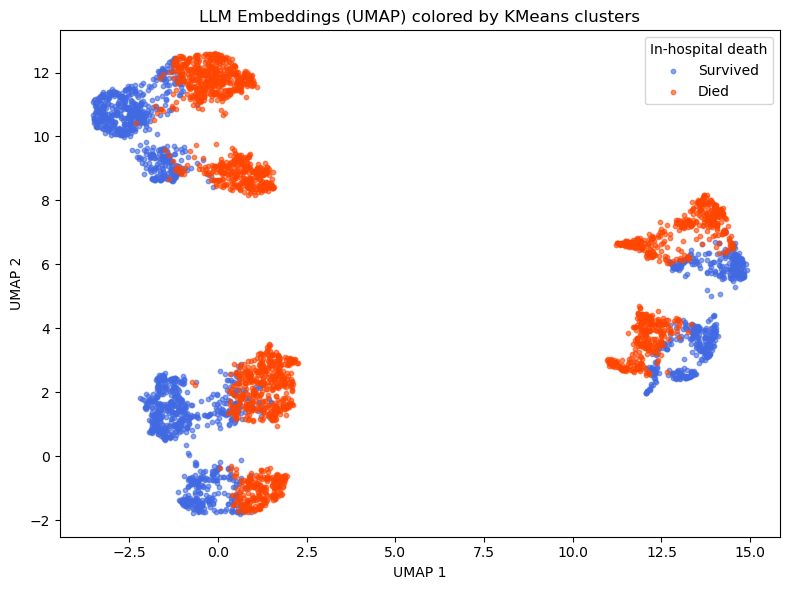

In [47]:
plt.figure(figsize=(8, 6))

colors = ['royalblue', 'orangered']
labels = ['Survived', 'Died']

for cls, color, label in zip([0, 1], colors, labels):
    plt.scatter(
        X_llm_2d[clusters == cls, 0],
        X_llm_2d[clusters == cls, 1],
        c=color,
        label=label,
        s=10,
        alpha=0.6
    )

plt.title("LLM Embeddings (UMAP) colored by KMeans clusters")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(title="In-hospital death")
plt.tight_layout()
plt.show()